In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
df = pd.read_csv("C:/Users/VIKAS KUMAR/Documents/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [46]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB




## observation from info
- As their is no object Dtype present in our data set ie we have no to worry about the conversion of categorical variabe into numerical variable

In [48]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


## observation from describe

- All the features having same count ie 1338 so we conclude that our dataset doesnot contain any null value..

- Maximum insurance claim are done by the person which are in age between 39 to 64.

- According to our data set the maximum smoker are observed in the age of 64 or 64+.

- Age between 18-39 has done no insurance claim.



## performing EDA 

1. Missing value
2. Explore about the numerical variables
3. Explore about categorical variables
4. Finding relationship between features

In [49]:
df.shape


(1338, 8)

ie our data set contain total 1338 count of rows and 8 features including our target feature.

In [50]:
df.size

10704

In [51]:
## checking for null value
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

## observation
- our data set doesnot contain any null value so we have no to worry about the process of imputation or handling the missing values.

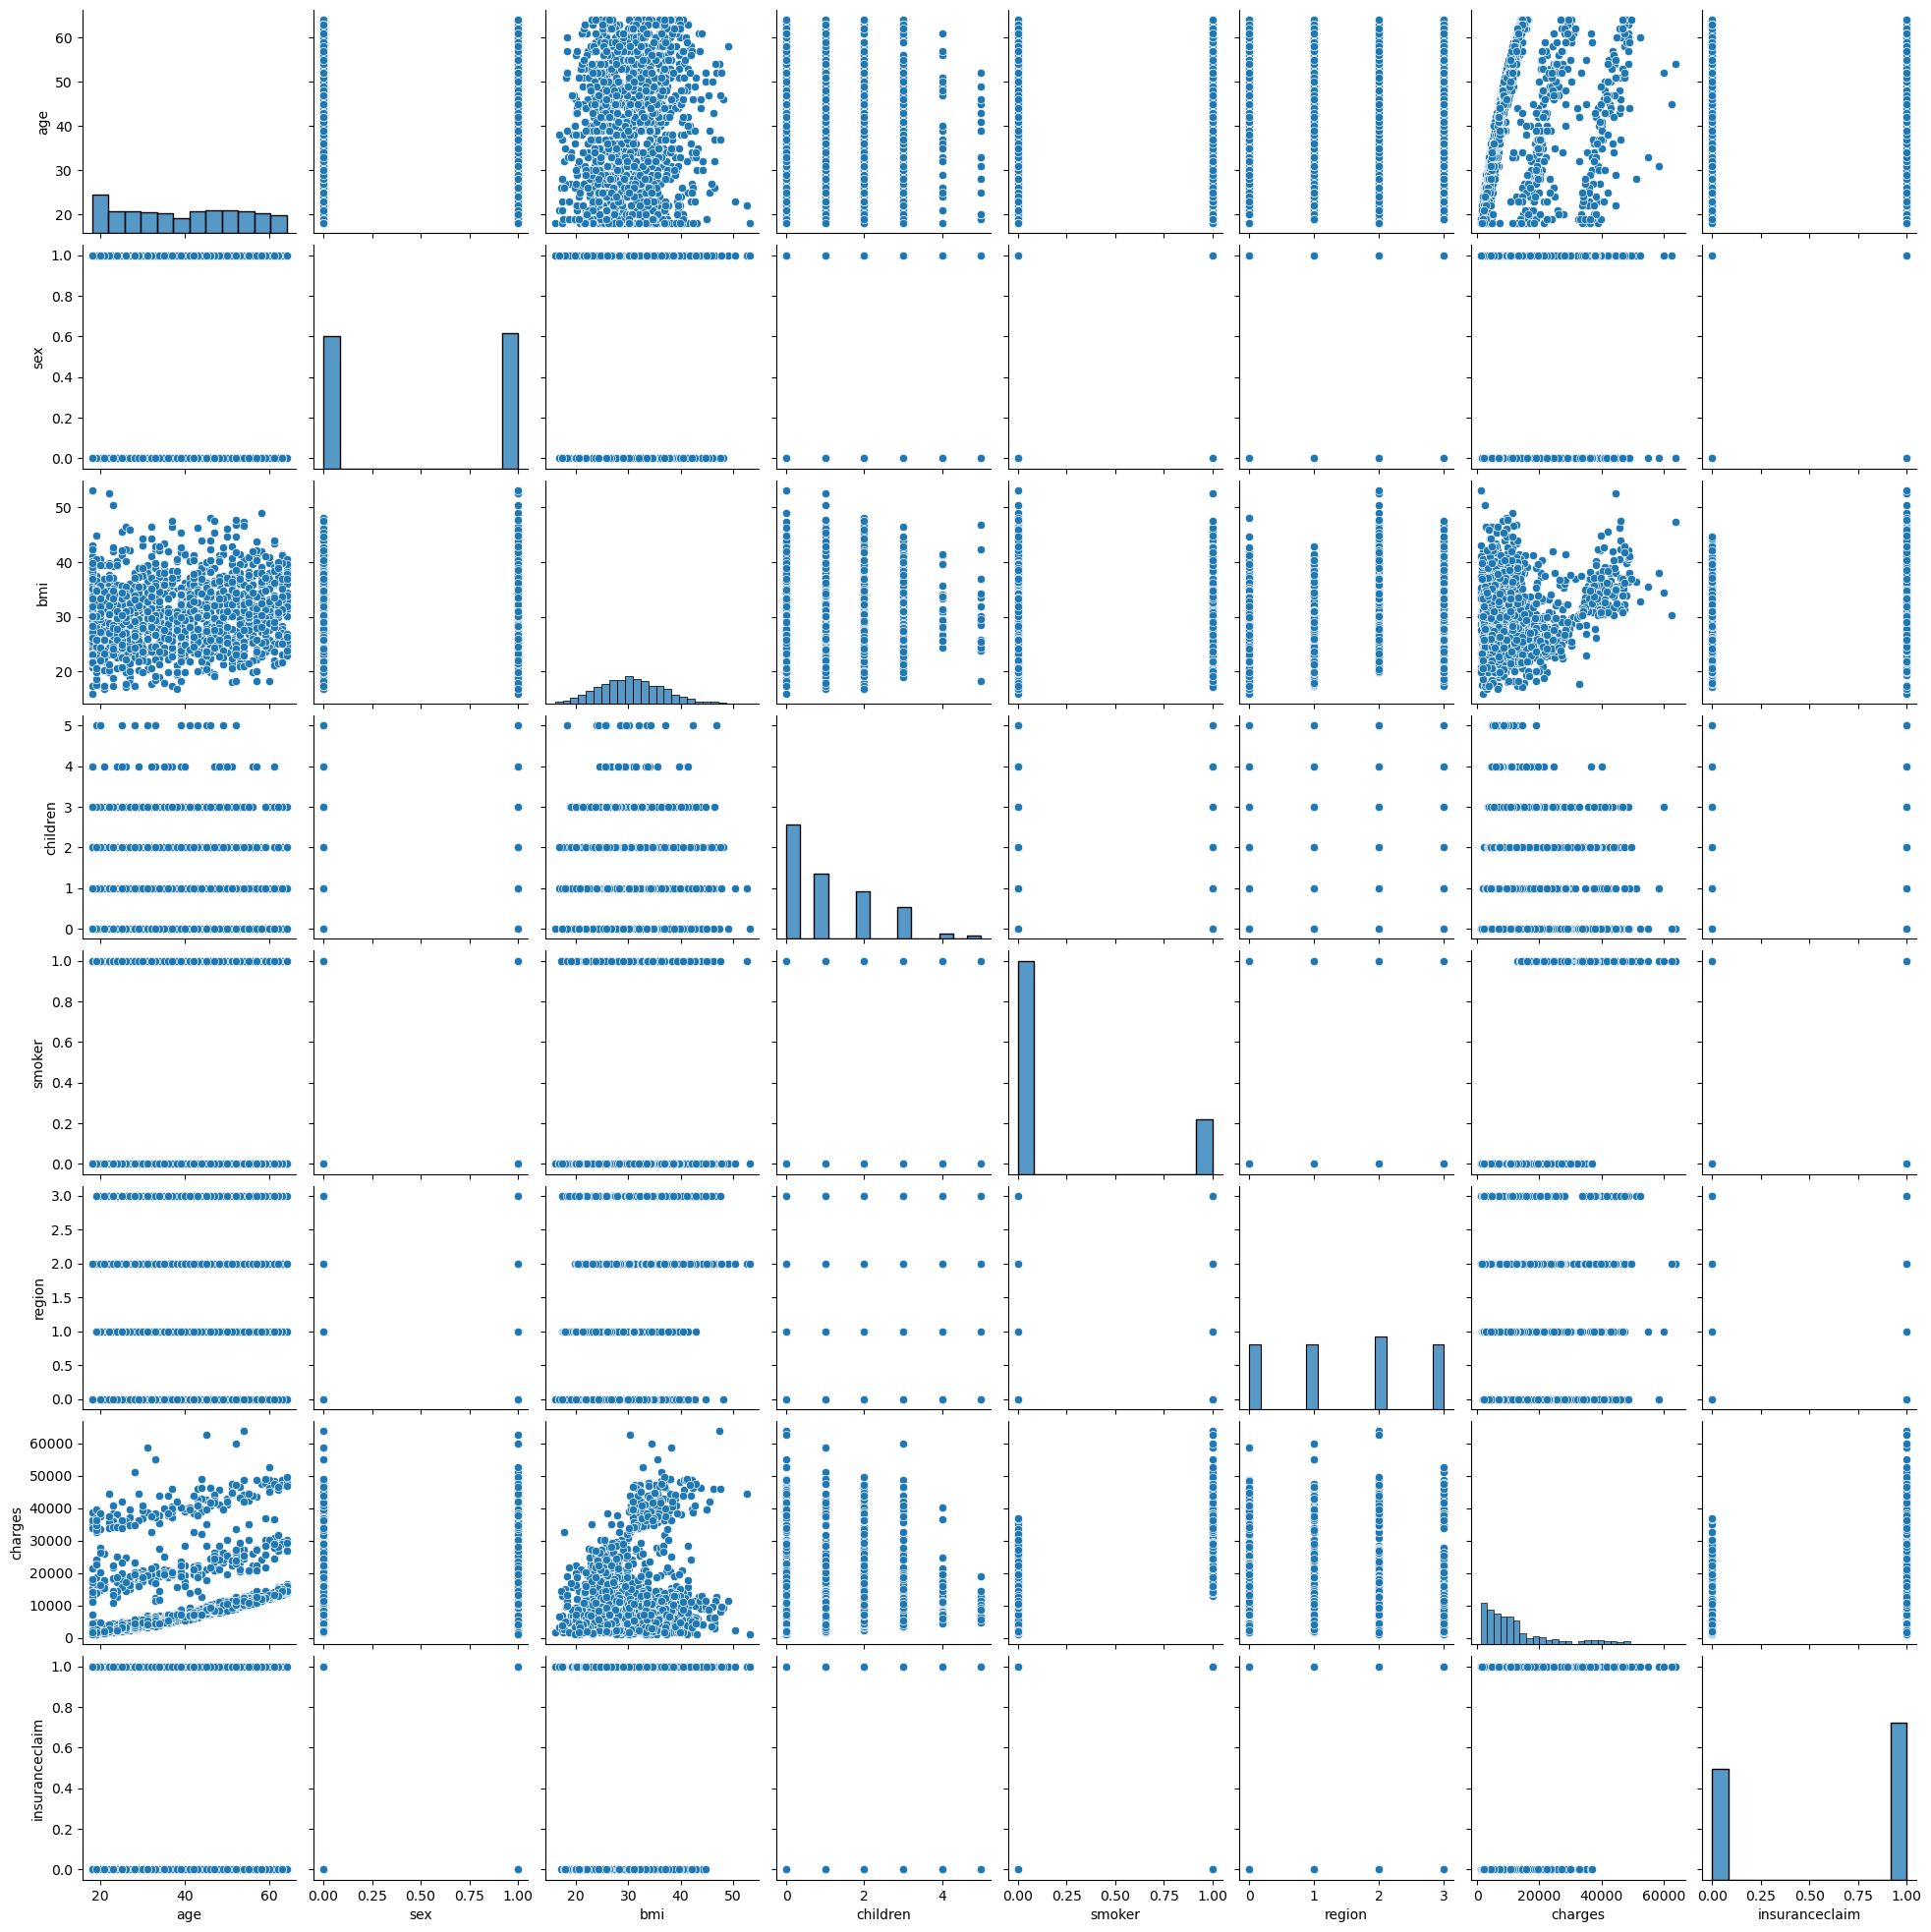

In [52]:
# visualisation
sns.pairplot(df)

## observation 

- from this pairplot we observe the various realtionship among the features like correlation , outlier etc.

<AxesSubplot:xlabel='age', ylabel='smoker'>

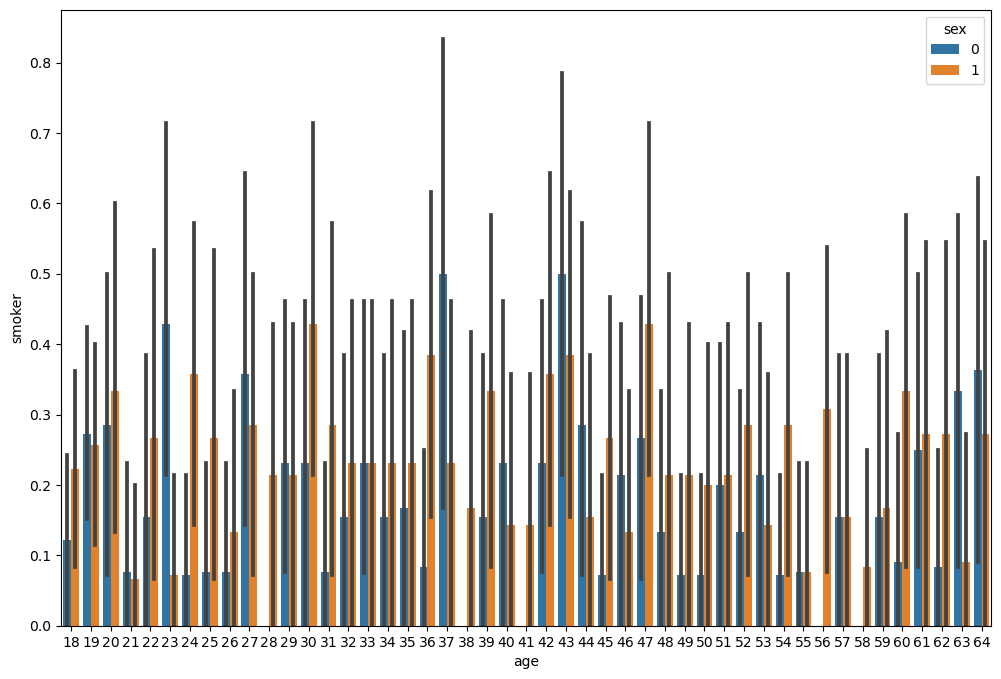

In [53]:
## visulation between age vs smoker.
import matplotlib
matplotlib.rcParams["figure.figsize"]=(12,8)
sns.barplot(x="age",y="smoker",hue="sex",data=df)

## observation
- from this we observe that in the features ie sex in this the category which are represented by 0 have more smoking history as compare to the category which are represented by 1.

<AxesSubplot:>

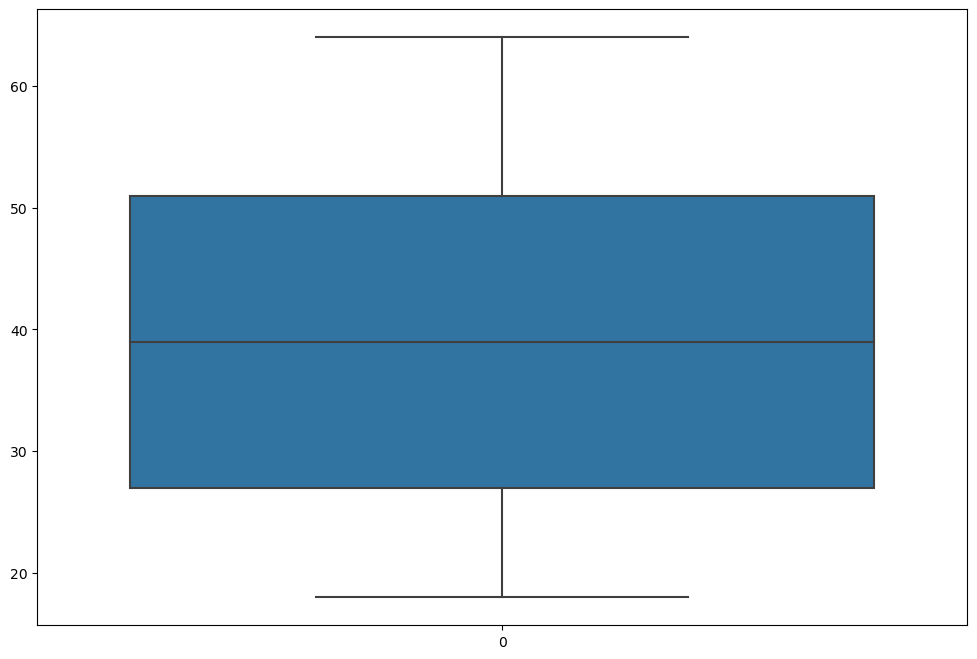

In [54]:
## lets see outliers

# for age
sns.boxplot(df["age"])

<AxesSubplot:>

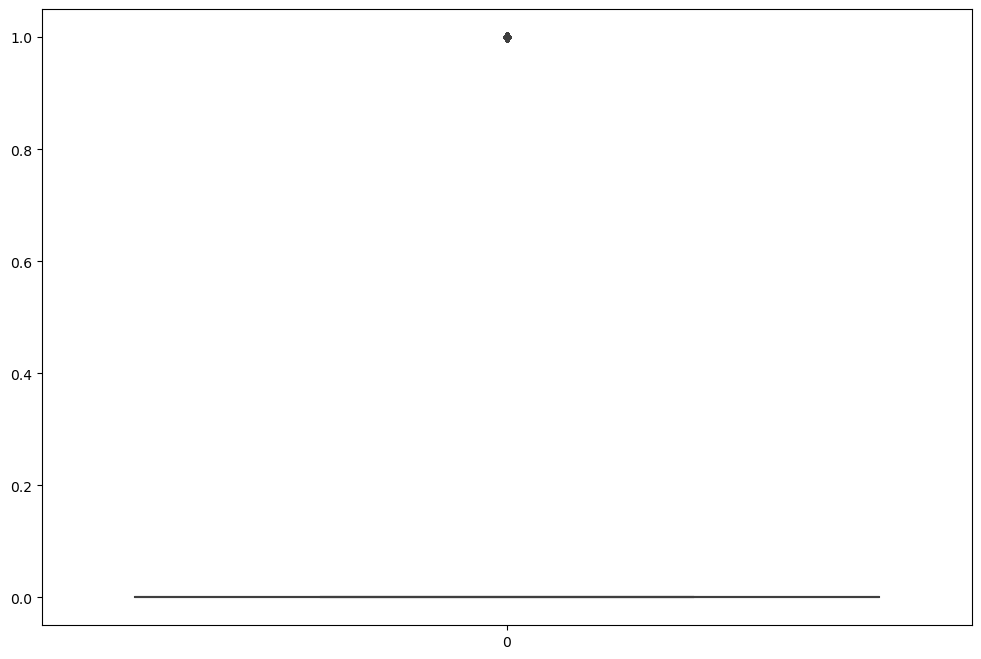

In [55]:
# for smoker
sns.boxplot(df["smoker"])

<AxesSubplot:>

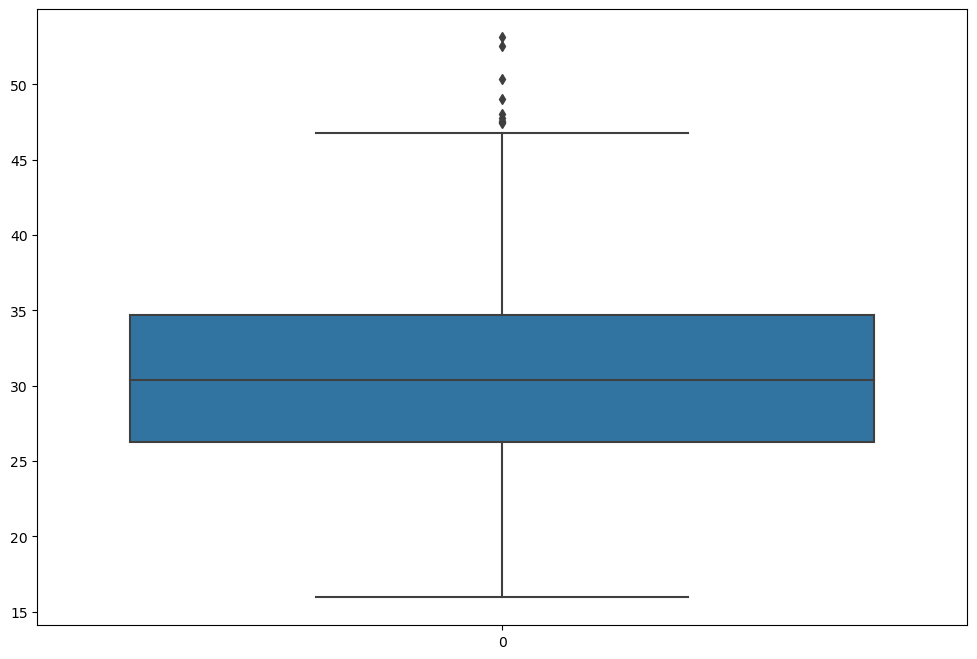

In [56]:
# for bmi
sns.boxplot(df["bmi"])

## observation

### from the above box plot we see that only bmi has outlier so lets remove the outlier from the feature bmi

In [57]:
# lets handle the outliers

percentile25 = df["bmi"].quantile(0.25)
percentile75 = df["bmi"].quantile(0.75)

In [58]:
# calculation of IQR(inter quartile range)
IQR = percentile75-percentile25
IQR

8.3975

In [59]:
upper_limit = percentile75 + 1.5*IQR
lower_limit = percentile25 - 1.5*IQR

In [60]:
print(upper_limit)
print(lower_limit)

47.290000000000006
13.7


from the box plot we observe that the outlier are present only in our upper limit not in lower limit so we apply condtion only for upper limit to get rid of outliers.

In [61]:
df[df["bmi"]>upper_limit]



,age,sex,bmi,children,smoker,region,charges,insuranceclaim
116,58,1,49.06,0,0,2,11381.32540,1
286,46,0,48.07,2,0,0,9432.92530,1
401,47,1,47.52,1,0,2,8083.91980,1
543,54,0,47.41,0,1,2,63770.42801,1
847,23,1,50.38,1,0,2,2438.05520,1
860,37,0,47.60,2,1,3,46113.51100,1
1047,22,1,52.58,1,1,2,44501.39820,1
1088,52,1,47.74,1,0,2,9748.91060,1
1317,18,1,53.13,0,0,2,1163.46270,1


## observation

- these are our 9 observation which have outliers

## Trimming

In [62]:
new_df=df[df["bmi"]<upper_limit]

In [63]:
new_df.shape

(1329, 8)

In [65]:
# checking for correlation using heat map
X = new_df.drop(["insuranceclaim"],axis=1)

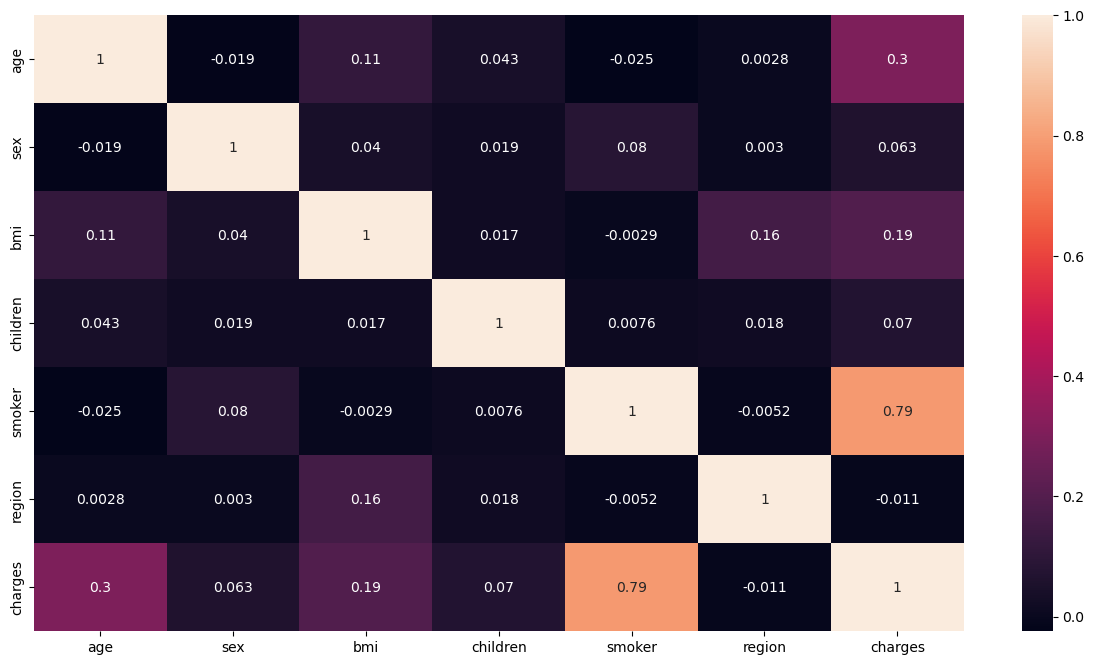

In [66]:
# checking for correlation of independent features
plt.figure(figsize=(15,8))
cor = X.corr()
sns.heatmap(cor,annot = True)
plt.show()

In [67]:
def correlation(dataset, threshold):
    col_corr=set() # set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr        

In [68]:
corr_features = correlation(X,0.7)
len(set(corr_features))

1

In [69]:
print(corr_features)

{'charges'}


## observation from heatmap

- as from the heatmap we observe that their is only one feature which show maximum correlation ie feature name "charges" so we have to remove this feature from our training data set to get proper accuracy

In [70]:
# spliting data into feature set , target set
X = new_df.drop(["insuranceclaim","charges","region"],axis=1) # as region is not a important feature regarding to our problem statement.
y = new_df["insuranceclaim"]

In [71]:
X.shape

(1329, 5)

In [72]:
y.shape

(1329,)

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 12)

In [74]:
#  Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [75]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (996, 5)
X_test: (333, 5)
y_train: (996,)
y_test: (333,)


 ## as we can see that our target variable ie insurance claim has two classes so we can say that it is a problem of classification

### applying classification algorithm 

## 1. applying logistic regression

In [77]:

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [80]:
# applying and fit the model
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [81]:
## prediction
y_pred1 = lr.predict(X_test)
y_pred1

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,

In [82]:
# checking model for prediction accuracy

In [83]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test,y_pred1)
acc1

0.8678678678678678

In [84]:
## lets see some metrics regarding classification

In [85]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [86]:
# 1.precision 
ps1 = precision_score(y_test,y_pred1)
ps1

0.8647342995169082

In [87]:
# 2. recall
rs1 = recall_score(y_test,y_pred1)
rs1

0.9179487179487179

In [88]:
# f1 score
f1_s1 = f1_score(y_test,y_pred1)
f1_s1

0.890547263681592

## 2 . support vector machine

In [90]:
from sklearn import svm
# applying and fit the model
svm = svm.SVC()

svm.fit(X_train,y_train)

SVC()

In [92]:
# prediction

y_pred2 = svm.predict(X_test)
y_pred2

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,

In [93]:
## checking accuracy
acc2 = accuracy_score(y_test,y_pred2)
acc2

0.918918918918919

In [94]:
## precision
ps2 = precision_score(y_test,y_pred2)
ps2

0.9375

In [95]:
# recall
rs2 = recall_score(y_test,y_pred2)
rs2

0.9230769230769231

In [96]:
# f1 score

f1_s2 = f1_score(y_test,y_pred2)
f1_s2

0.9302325581395349

## 3. Random forest classifier

In [98]:
from sklearn.ensemble import RandomForestClassifier
# applying and fitting the model

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [99]:
# prediction

y_pred3 = rfc.predict(X_test)

In [100]:
# accuracy

acc3 = accuracy_score(y_test,y_pred3)
acc3

0.9819819819819819

In [101]:
# precision

ps3 = precision_score(y_test,y_pred3)
ps3

0.9796954314720813

In [102]:
# recall

rs3 = recall_score(y_test,y_pred3)
rs3

0.9897435897435898

In [103]:
# f1 score

f1_s3 = f1_score(y_test,y_pred3)
f1_s3

0.9846938775510204

## 4. Decision tree classifier

In [104]:
from sklearn.tree import DecisionTreeClassifier
# applying and fitting the model
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)


DecisionTreeClassifier()

In [105]:
# prediction

y_pred4 = dtc.predict(X_test)

In [106]:
# accuracy

acc4 = accuracy_score(y_test,y_pred4)
acc4

0.984984984984985

In [107]:
# precision

ps4 = precision_score(y_test,y_pred4)
ps4

0.9846938775510204

In [110]:
# recall

rs4 = recall_score(y_test,y_pred4)
rs4

0.9897435897435898

In [111]:
# f1 score

f1_s4 = f1_score(y_test,y_pred4)
f1_s4

0.9872122762148339

In [112]:
final_df = pd.DataFrame({'Models':['LR','SVC','RF','DT'],
                        'ACC':[acc1,acc2,acc3,acc4],
                        'PS':[ps1,ps2,ps3,ps4],
                        'RS':[rs1,rs2,rs3,rs4],
                        'F1':[f1_s1,f1_s2,f1_s3,f1_s4]})

In [113]:
final_df

,Models,ACC,PS,RS,F1
0,LR,0.867868,0.864734,0.917949,0.890547
1,SVC,0.918919,0.937500,0.923077,0.930233
2,RF,0.981982,0.979695,0.989744,0.984694
3,DT,0.984985,0.984694,0.989744,0.987212


## final observation

### as we can see from the above table that Decision Tree Classifier is working well for this data set

## Therefore we use decision tree classifier for this model